>> ### Correlation between news and stock movement for AMZN

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates

newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [16]:
newsData.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,Date,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,2020-05-22,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,2020-05-22,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,2020-05-22,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,2020-05-22,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,2020-05-22,0.00


>> #### Aggregate Sentiments by Date

In [7]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [13]:
sentimentData.head(10)

,Date,Sentiment
0,2011-04-28,0.045455
1,2011-04-29,0.166667
2,2011-04-30,0.500000
3,2011-05-01,0.000000
4,2011-05-02,-0.009259
5,2011-05-03,0.000000
6,2011-05-05,0.000000
7,2011-05-06,0.166667
8,2011-05-07,0.000000
9,2011-05-08,0.500000


>> #### Calculate Daily Stock Returns

In [8]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [15]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,-11.702769
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,-1.204047
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,-4.268472
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,-12.739234
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0,-2.189084
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0,7.462174
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0,5.555997
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0,-3.289250
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0,-1.701869


>> #### Merge Datasets

In [9]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [14]:
mergedData.head(10)

,Date,Sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,2011-04-28,0.045455,9.7980,9.8395,9.6135,9.7535,9.7535,146000000,0.0,0.0,-0.793369
1,2011-04-29,0.166667,9.7190,9.8295,9.6890,9.7905,9.7905,132818000,0.0,0.0,0.379348
2,2011-05-02,-0.009259,9.8285,10.1710,9.8090,10.0595,10.0595,187962000,0.0,0.0,2.747562
3,2011-05-03,0.000000,10.0500,10.1295,9.8345,9.9225,9.9225,122000000,0.0,0.0,-1.361898
4,2011-05-05,0.000000,9.9330,10.0500,9.8060,9.8555,9.8555,92000000,0.0,0.0,-1.430211
5,2011-05-06,0.166667,9.9550,9.9780,9.8280,9.8800,9.8800,80278000,0.0,0.0,0.248591
6,2011-05-09,0.045455,9.9170,10.1180,9.8390,10.0400,10.0400,116508000,0.0,0.0,1.619432
7,2011-05-11,-0.029167,10.1560,10.2750,10.1125,10.2190,10.2190,96180000,0.0,0.0,0.215753
8,2011-05-12,0.500000,10.2110,10.3095,10.0310,10.3035,10.3035,96000000,0.0,0.0,0.826894
9,2011-05-13,-0.077778,10.2850,10.3195,10.1180,10.1280,10.1280,82474000,0.0,0.0,-1.703304


>> #### Correlation Analysis

In [10]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: -0.02, P-value: 0.2700


>> #### Visualization

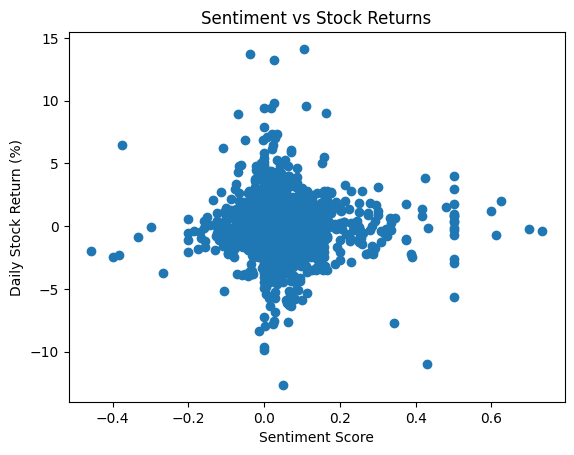

In [11]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)